# Credit Card Fraud

Using [this credit card fraud dataset](https://www.kaggle.com/mlg-ulb/creditcardfraud/kernels) develop an algorithm to predict fraud. Prioritize correctly finding fraud rather than correctly labeling non-fraudulent transactions.

### Context
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

### Content
The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

In [1]:
# Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
creditcard = pd.read_csv('creditcard.csv')
pd.set_option('display.max_columns', None)
creditcard.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Exploring the data

In [3]:
creditcard.shape

(284807, 31)

In [4]:
#Check imbalance on label data
creditcard.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [5]:
creditcard.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.165980e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.373150e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.086869e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.490107e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.177556e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406455e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [3]:
creditcard.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

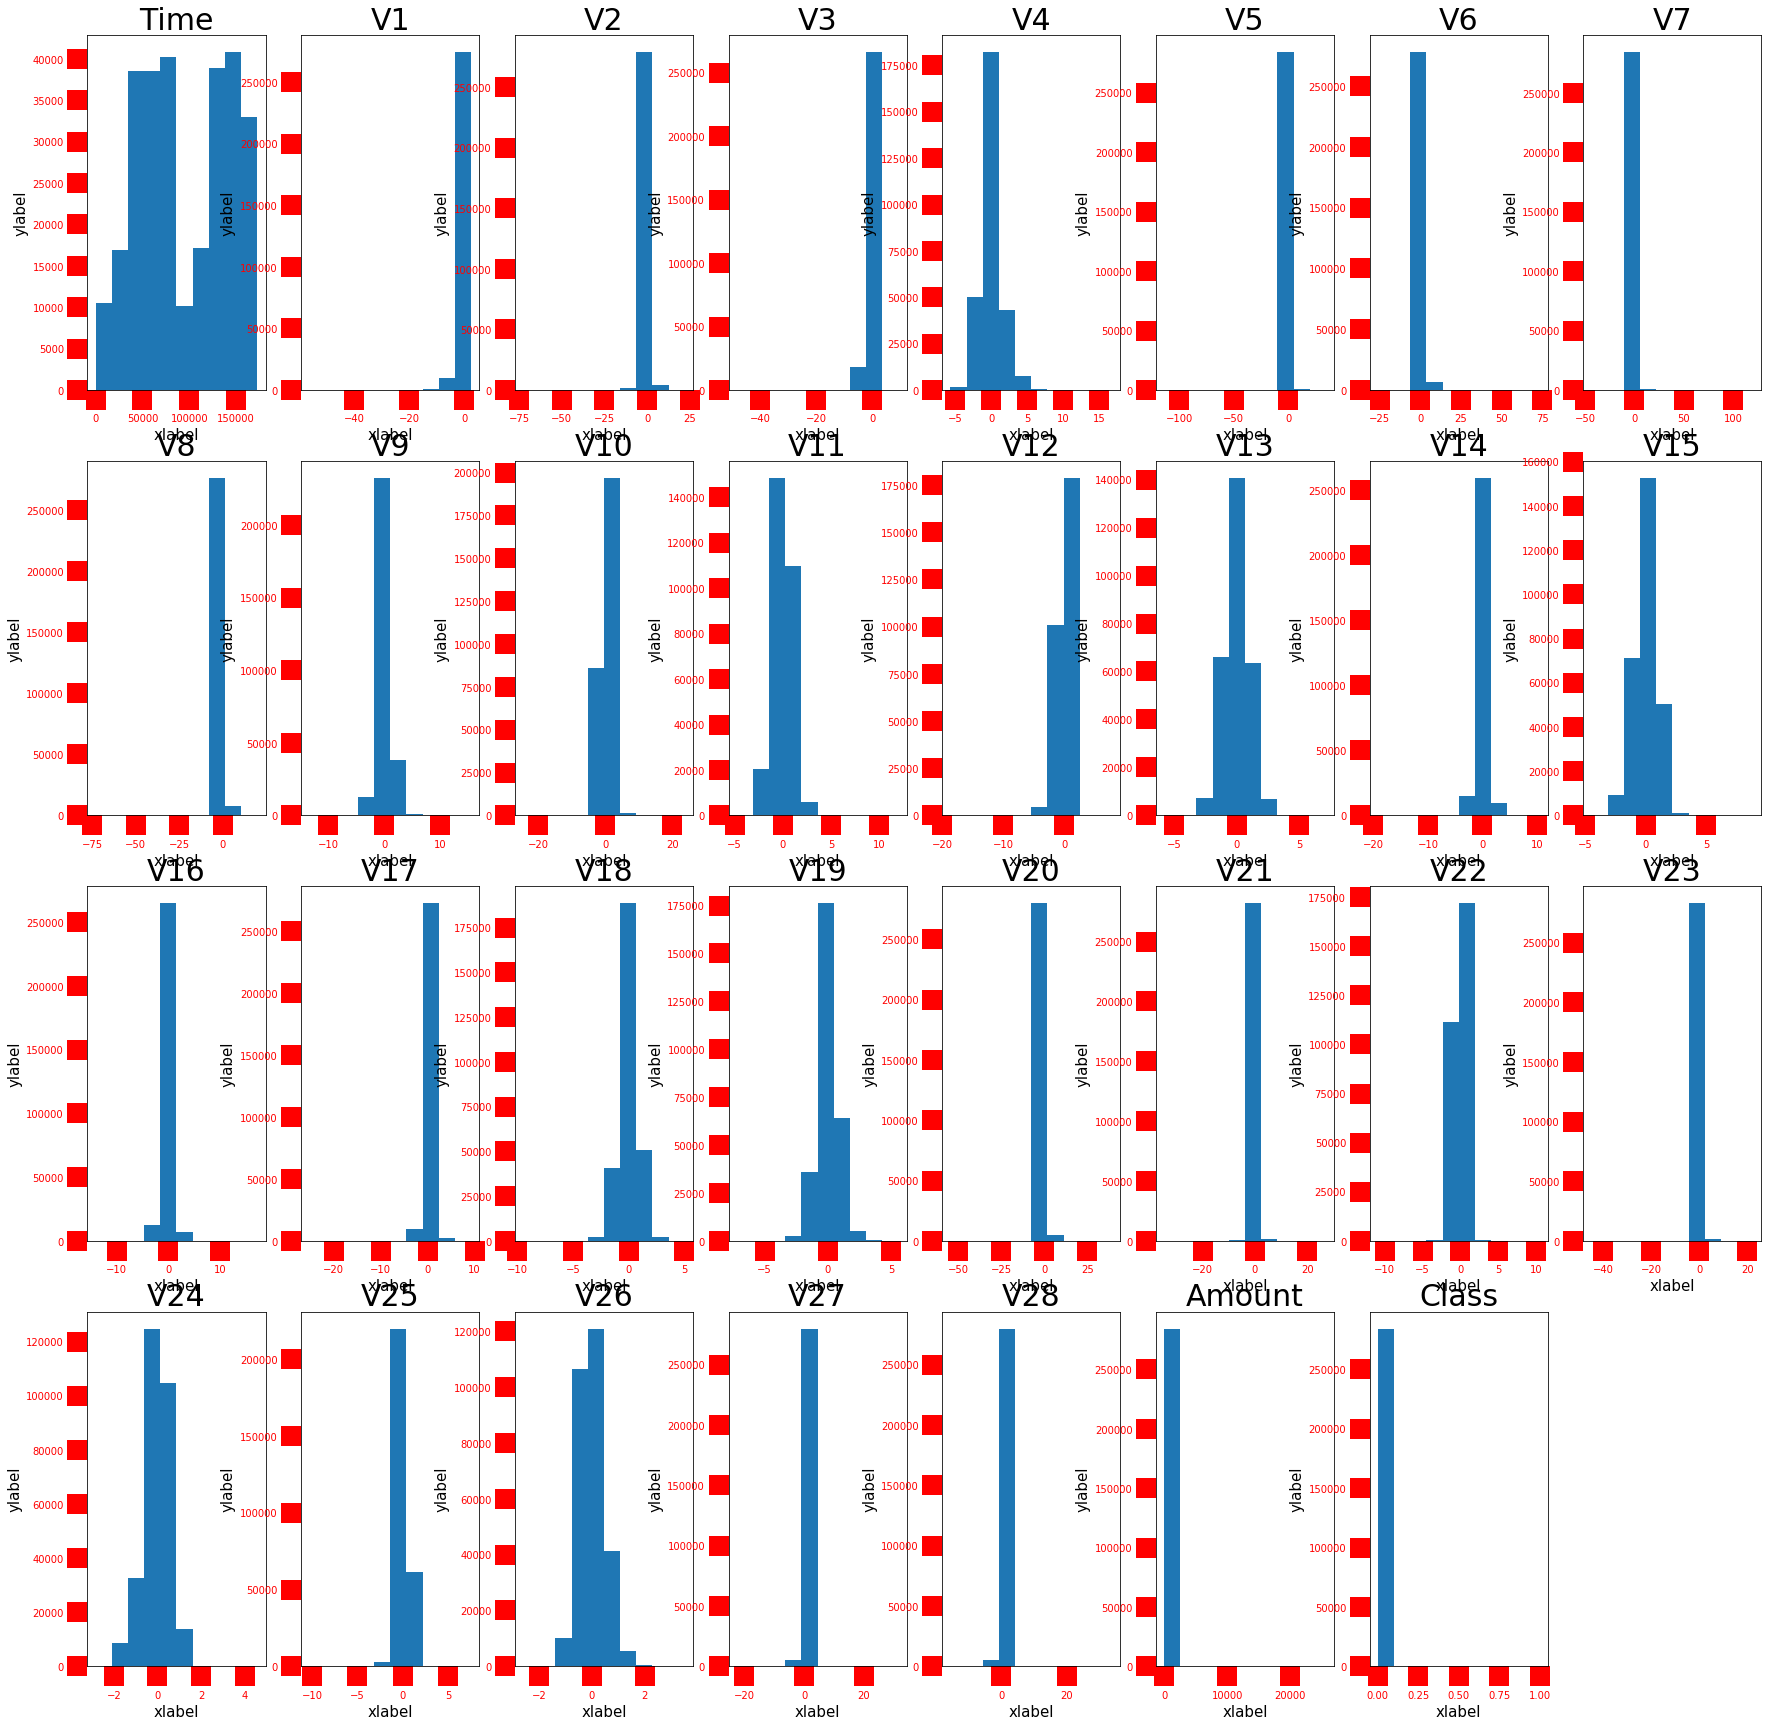

In [8]:

dic_col = {'Time':1, 'V1':2, 'V2':3, 'V3':4, 'V4':5, 'V5':6, 'V6':7, 'V7':8, 'V8':9, 'V9':10, 'V10':11,
       'V11':12, 'V12':13, 'V13':14, 'V14':15, 'V15':16, 'V16':17, 'V17':18, 'V18':19, 'V19':20, 'V20':21,
       'V21':22, 'V22':23, 'V23':24, 'V24':25, 'V25':26, 'V26':27, 'V27':28, 'V28':29, 'Amount':30,
       'Class':31}

# Detect outliers in each variable using box plots.
plt.figure(figsize=(30,30))

for variable,i in dic_col.items():
    plt.subplot(4,8,i)
    plt.hist(creditcard[variable])
  
   
    plt.xlabel('xlabel', fontsize=15)
    plt.ylabel('ylabel', fontsize=15)
    plt.tick_params(direction='out', length=20, width=20, colors='r',
               grid_color='r', grid_alpha=0.5)
    plt.title(variable, size = 30)

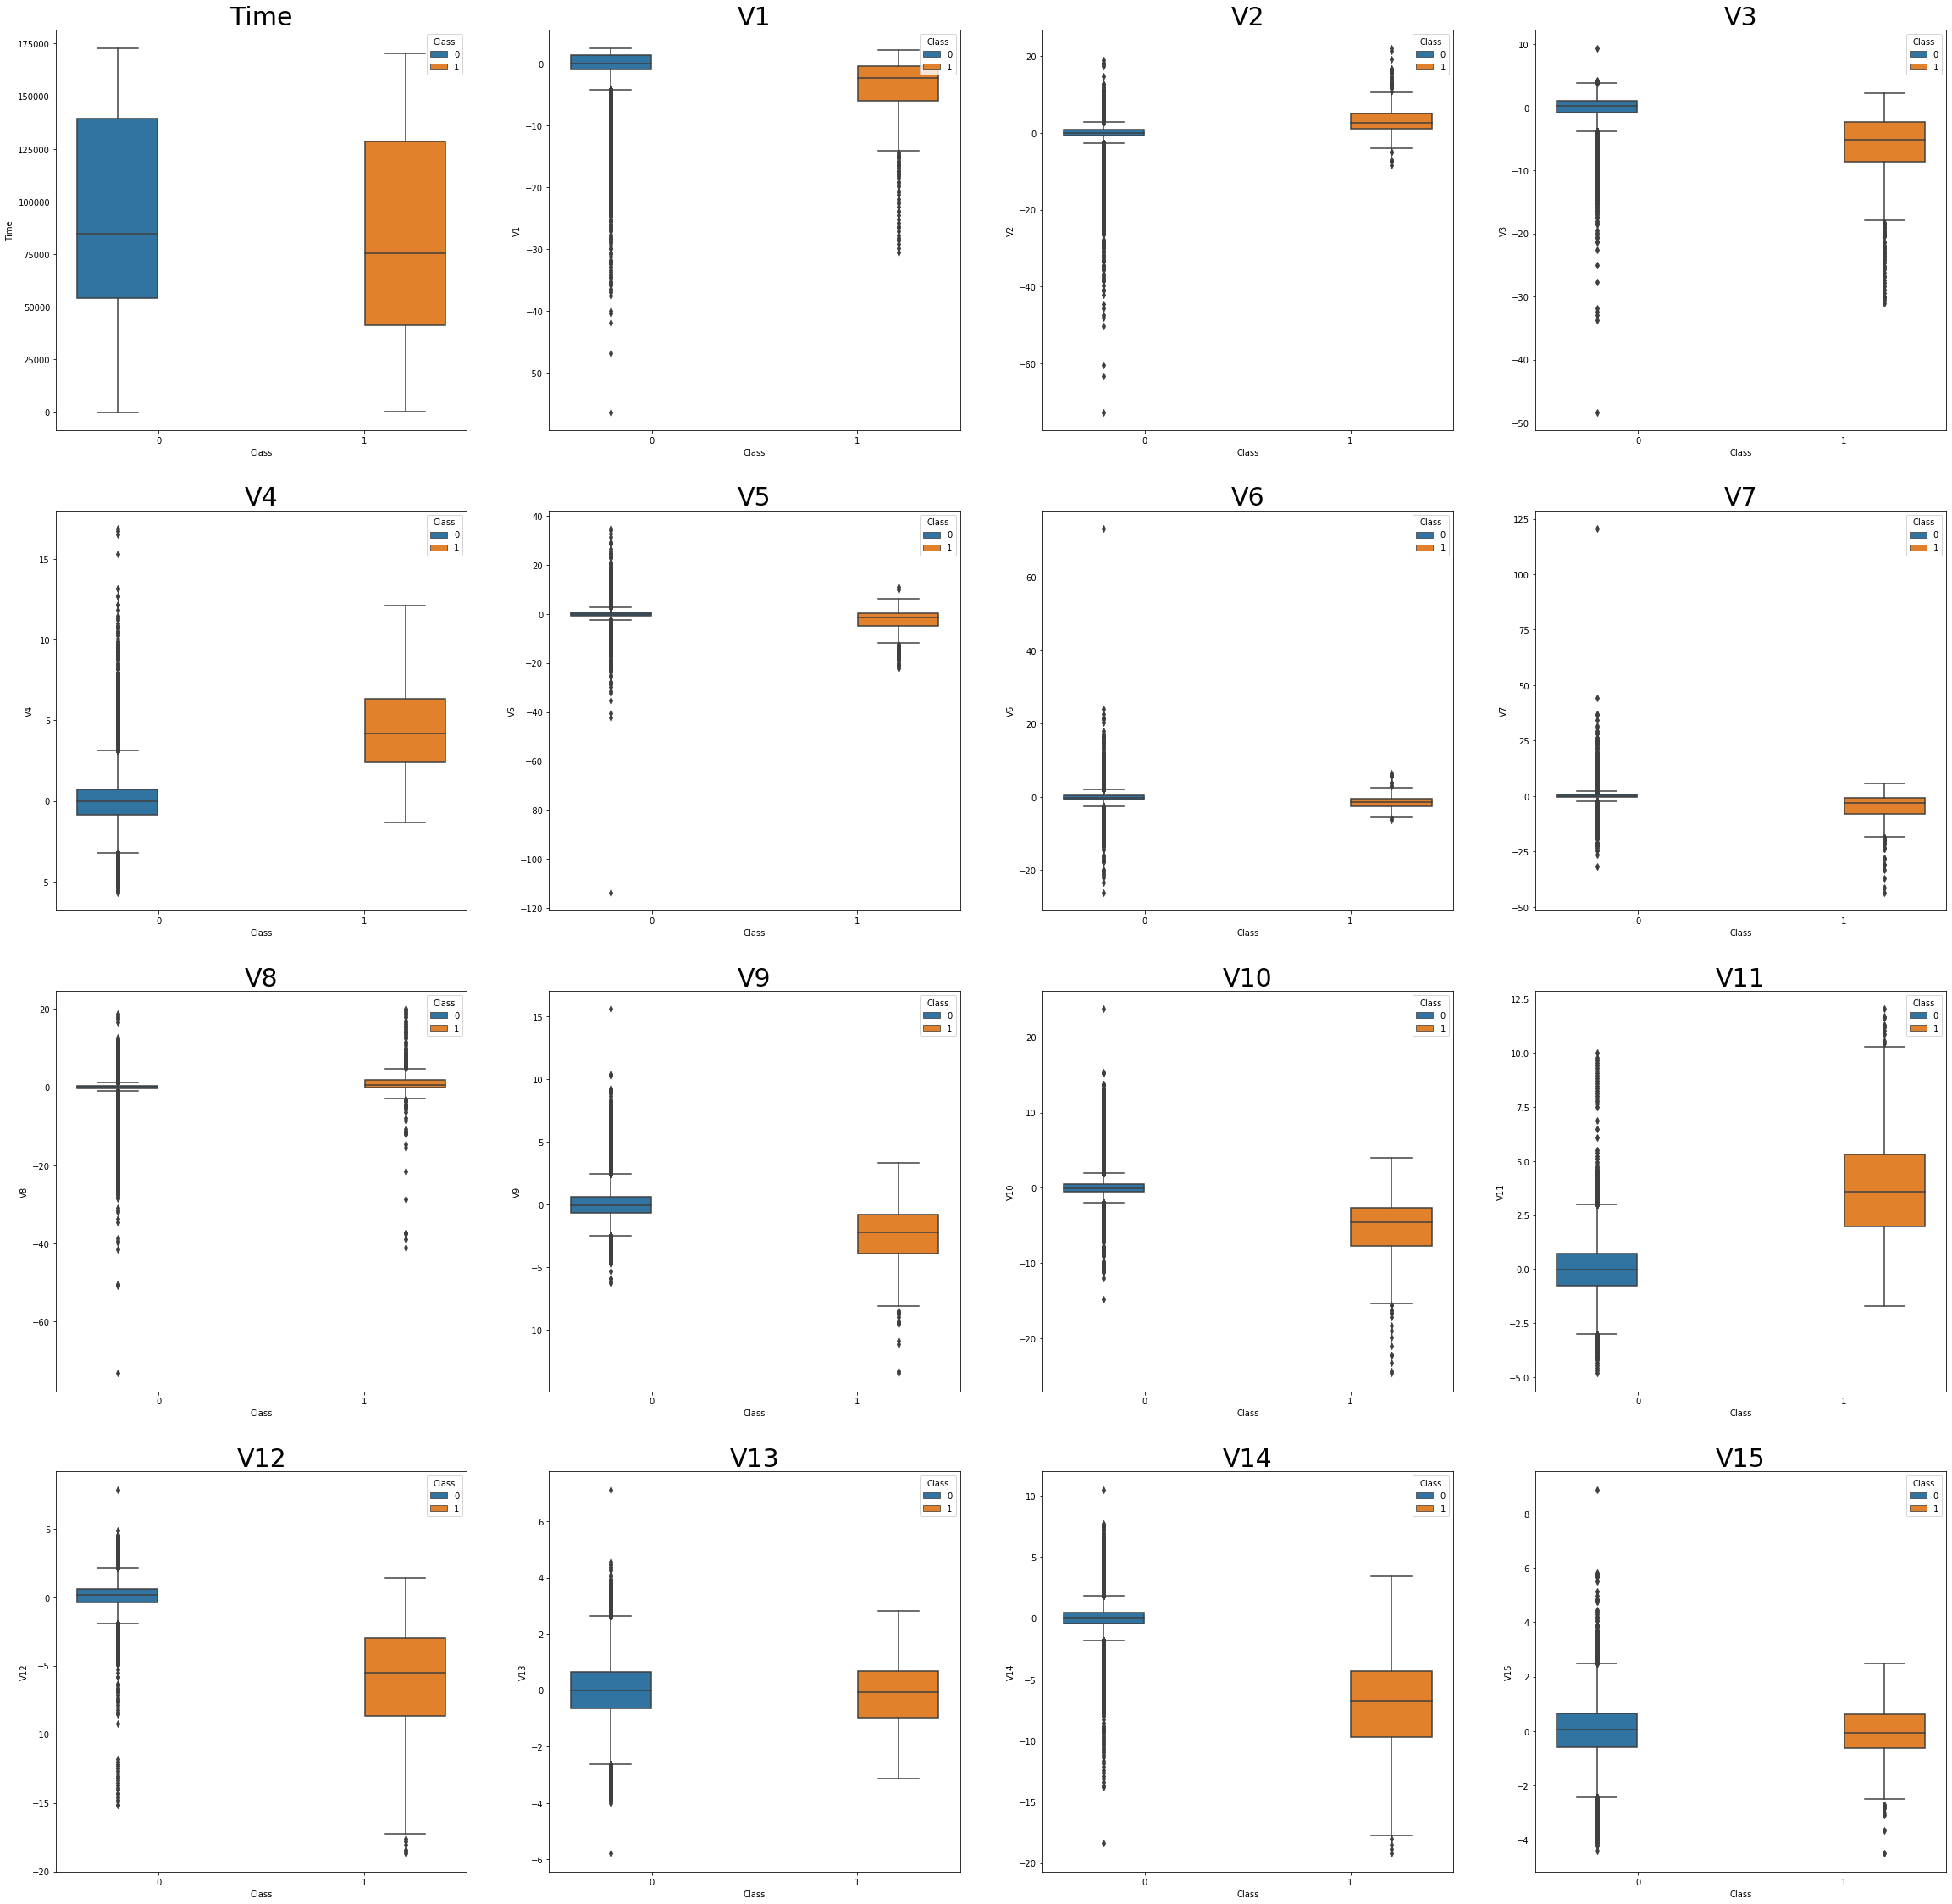

In [13]:
dic_col = {'Time':1, 'V1':2, 'V2':3, 'V3':4, 'V4':5, 'V5':6, 'V6':7, 'V7':8, 'V8':9, 'V9':10, 'V10':11,
       'V11':12, 'V12':13, 'V13':14, 'V14':15, 'V15':16}
# Detect outliers in each variable using box plots.
plt.figure(figsize=(40,40))

for variable,i in dic_col.items():
    plt.subplot(4,4,i)
    
    sns.boxplot(x='Class',y=creditcard[variable],hue='Class',data=creditcard)
    plt.title(variable, size=30)

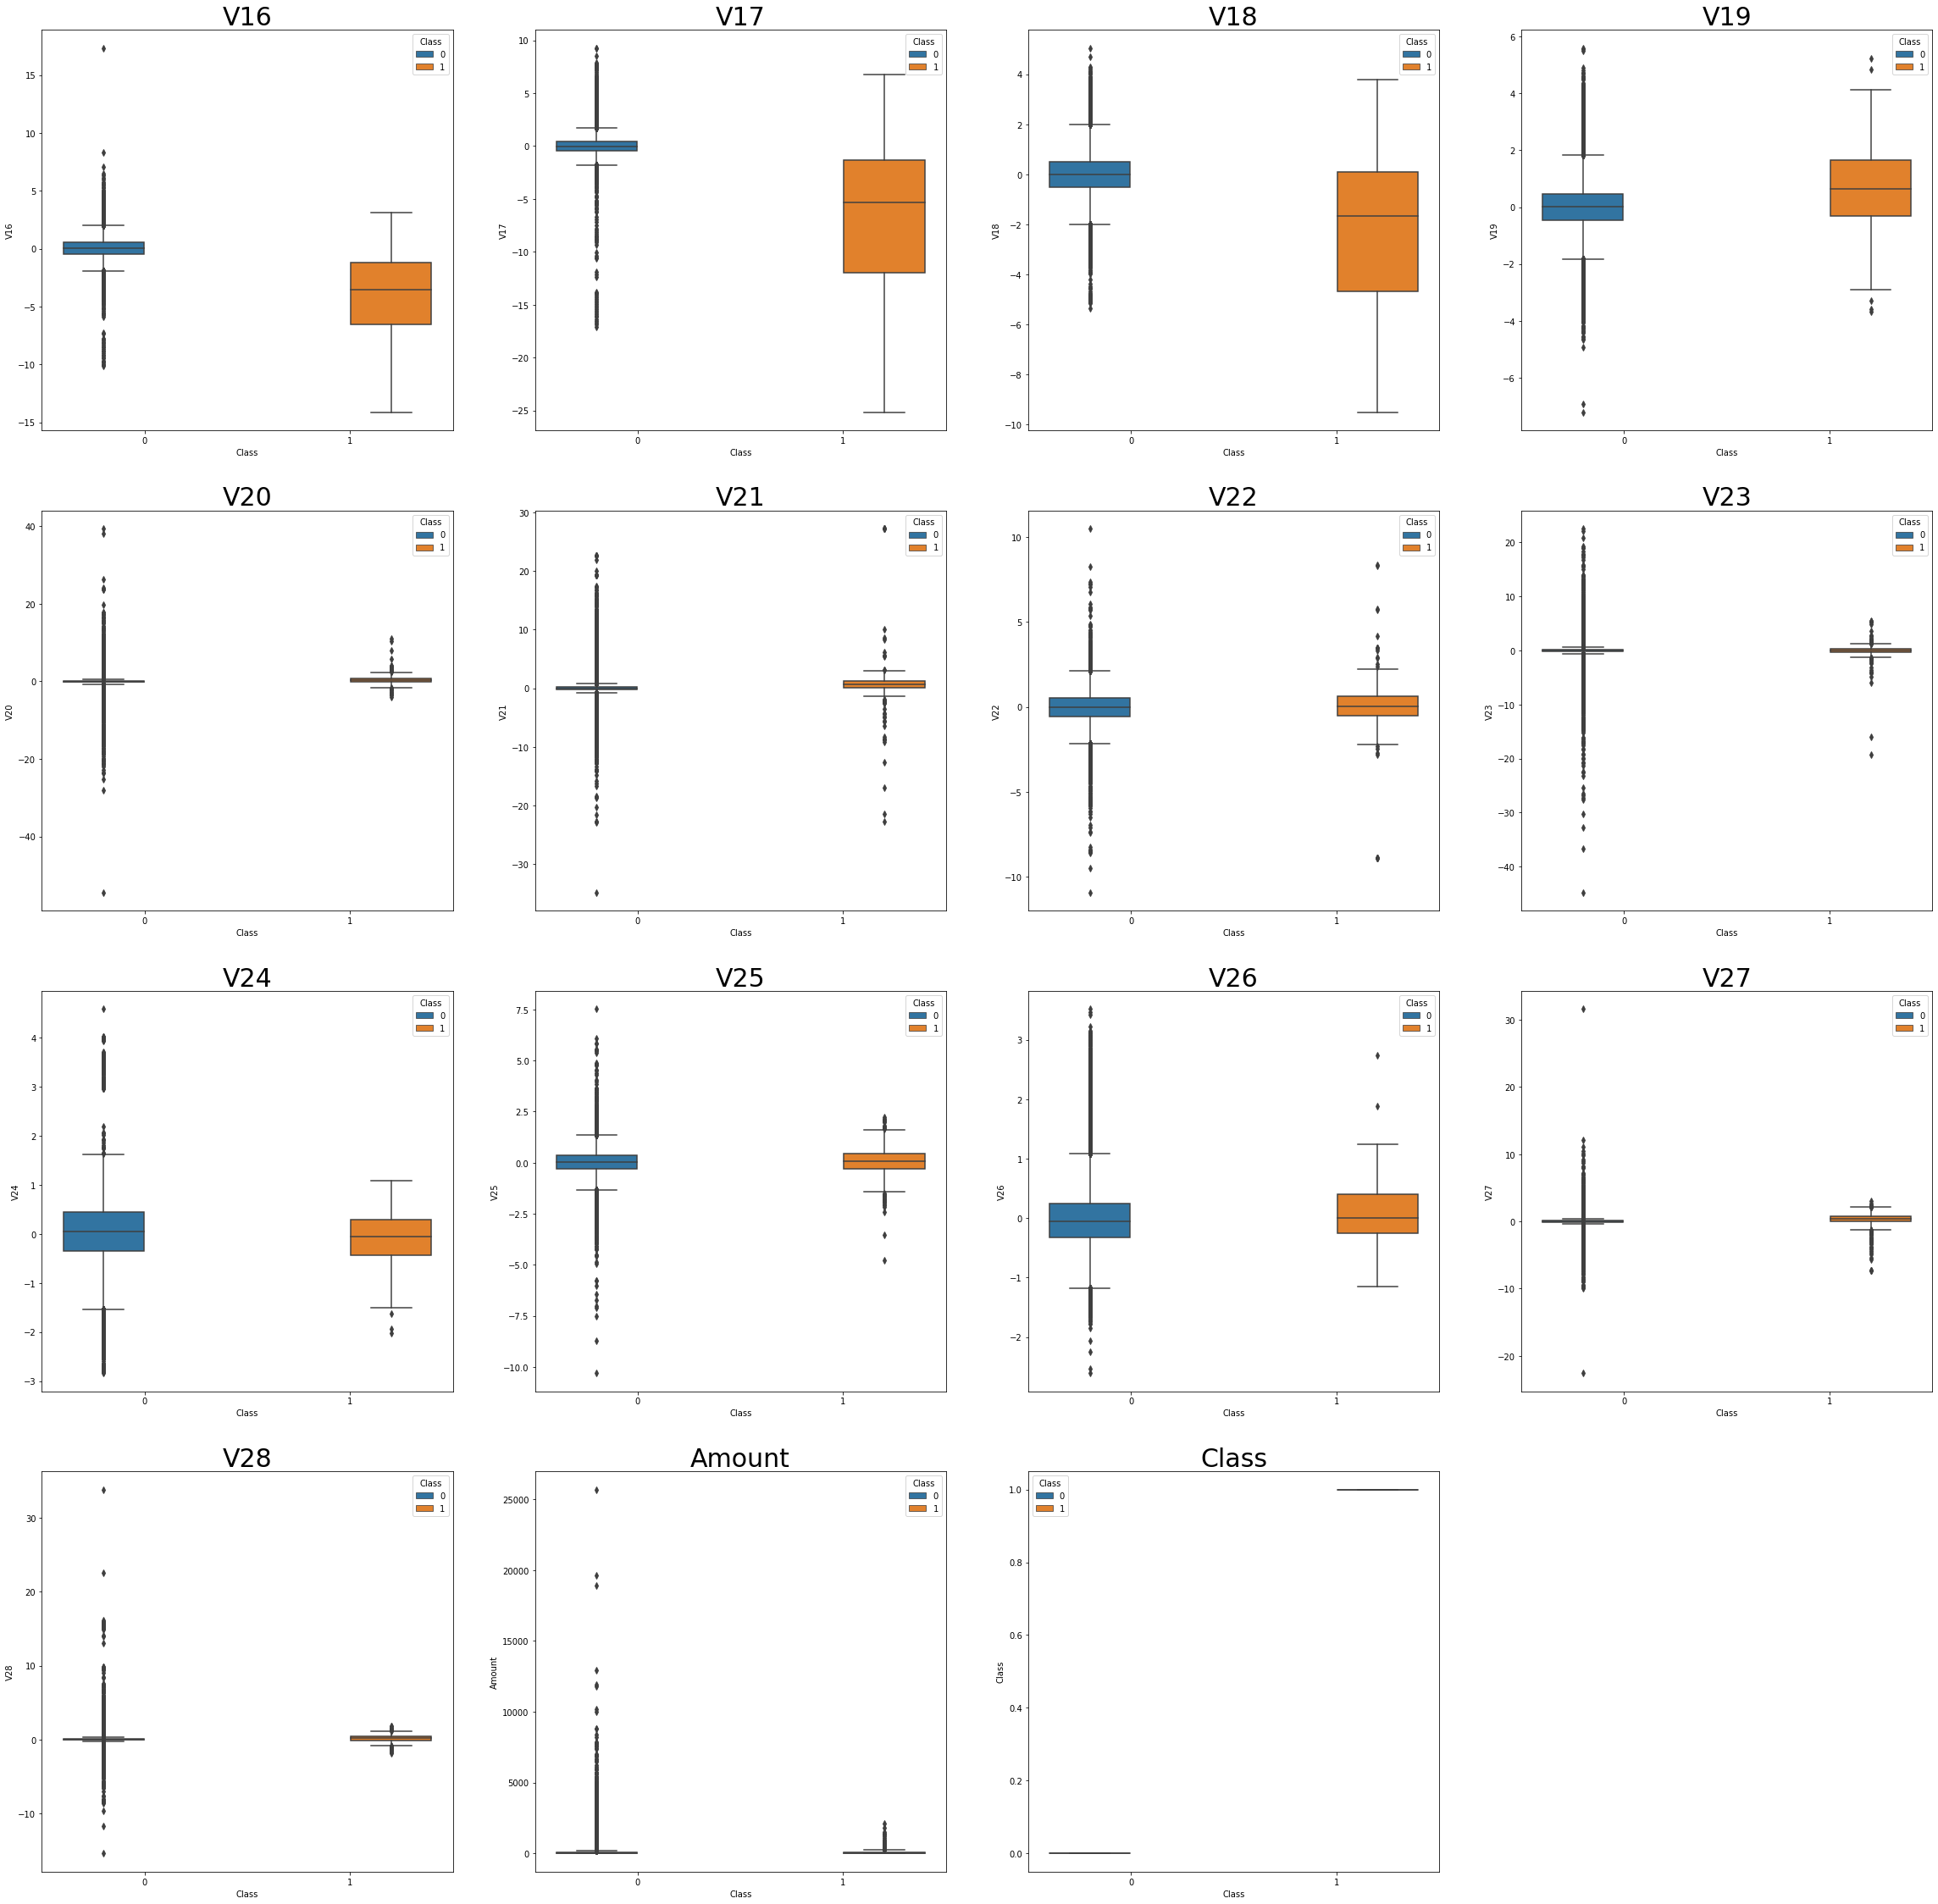

In [14]:

dic_col = {'V16':1, 'V17':2, 'V18':3, 'V19':4, 'V20':5,
       'V21':6, 'V22':7, 'V23':8, 'V24':9, 'V25':10, 'V26':11, 'V27':12, 'V28':13, 'Amount':14,
       'Class':15}
# Detect outliers in each variable using box plots.
plt.figure(figsize=(40,40))

for variable,i in dic_col.items():
    plt.subplot(4,4,i)
    
    sns.boxplot(x='Class',y=creditcard[variable],hue='Class',data=creditcard)
    plt.title(variable, size=30)

PCA features (V1 - V28) are already centered and standardized (because the principle components have to be centered and standardized before the transformation occurs).

Amount and Time are the only two components with different means and standard deviations. 

Features are centered, but contain several outliers.

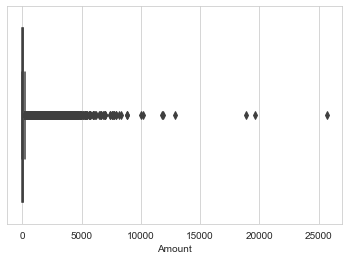

In [7]:
sns.boxplot(creditcard.Amount)

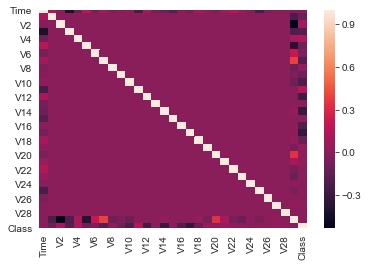

In [8]:
# Checking correlations
corrs = creditcard.corr()
sns.heatmap(corrs)

In [9]:
from sklearn import preprocessing
from sklearn import model_selection

# Scale using RobustScale to account for outliers in Amount
scaler = preprocessing.RobustScaler()
norm = scaler.fit_transform(creditcard.loc[:,['Amount', 'Time']])
norm = pd.DataFrame(norm, columns=['Amount', 'Time'])

# Get data into the right shape, drop Amount, Time, Class
credit = creditcard.loc[:, ~((creditcard.columns).isin(['Amount', 'Time', 'Class']))]

# Add transformed Amount and Time for final features (X) and create outcome (Y)
X = pd.concat([credit, norm], axis=1)
y = creditcard['Class']

# Split on X and y, stratifying on y
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, stratify=y)

In [10]:
scaler = preprocessing.RobustScaler()
scaler

RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True)

In [11]:
# Making the X_train set balanced w.r.t y

# First join X_train and y_train again
Xwithy = X_train.copy()
Xwithy['y']=y_train

# Then randomly select as 3 times as many features with y=0 as there are where y=1
countoffrauds = Xwithy.loc[Xwithy['y']==1, 'y'].sum()
notfrauds = Xwithy.loc[Xwithy['y']==0, :].sample(countoffrauds*3, replace=False)

# Get a dataset of only y=1
fraud = Xwithy.loc[Xwithy['y']==1,:]

# Join the two datasets
balanced = pd.concat([notfrauds, fraud])

#Split out X and y again
y_balanced = balanced['y']
X_balanced = balanced.drop('y', axis=1)

print(y_balanced.value_counts())
print(len(X_balanced))

0    1107
1     369
Name: y, dtype: int64
1476


## Logistic regression with Ridge


### Standard logistic model

Logistic regression is a good baseline model. The heatmap shows that multicollinearity is low among features and the scatter plots show some (log) linearity.

In [12]:
from sklearn import linear_model

# Running logit with Ridge penalty
logit = linear_model.LogisticRegression()
logit.fit(X_train, y_train)
y_hat = logit.predict_proba(X_test)[:,1]

# Assume threshold of .5
threshold = np.where(y_hat>0.5,1,0)
cross = pd.crosstab(threshold, y_test)#y_predicted, y_test 
print(cross)
acc = (cross[0][0]+cross[1][1])/len(y_hat)
sensitive = cross[1][1]/(cross[1][0]+cross[1][1])
print('Accuracy is: ', acc)
print('Sensitivity is: ', sensitive)

C:\Users\catan\.conda\envs\catanEnv\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Class      0   1
row_0           
0      71063  53
1         16  70
Accuracy is:  0.9990309260975815
Sensitivity is:  0.5691056910569106


In [13]:
logit

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
y_test.value_counts()

0    71079
1      123
Name: Class, dtype: int64

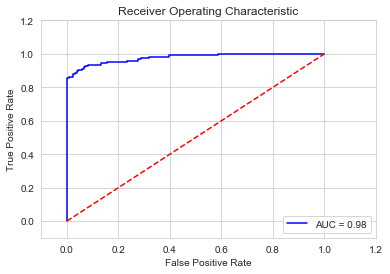

In [15]:
# Optimising threshold - focus is on predicting fraud

from sklearn import metrics

preds = logit.predict_proba(X_test)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [16]:
# Assume threshold of .2
threshold = np.where(y_hat>0.2,1,0)
cross = pd.crosstab(threshold, y_test)
print(cross)

# Change to df to make life easy
table_pd = pd.DataFrame(cross)

acc = (cross[0][0]+cross[1][1])/len(y_hat)

test_tI_errors = table_pd.iloc[0,1]/(table_pd.iloc[0,0]+table_pd.iloc[1,1]+
                                               table_pd.iloc[1,0]+table_pd.iloc[0,1])
test_tII_errors = table_pd.iloc[1,0]/(table_pd.iloc[0,0]+table_pd.iloc[1,1]+
                                               table_pd.iloc[1,0]+table_pd.iloc[0,1])
sensitive = table_pd.iloc[1,1]/(table_pd.iloc[1,1]+table_pd.iloc[0,1])
print((
    'Test set accuracy: {}\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n'
    'Test set sensitivity: {}').format(acc, test_tI_errors, test_tII_errors, sensitive))

Class      0   1
row_0           
0      71057  33
1         22  90
Test set accuracy: 0.9992275497879273
Percent Type I errors: 0.00046347012724361675
Percent Type II errors: 0.00030898008482907783
Test set sensitivity: 0.7317073170731707


In [17]:
table_pd 

Class,0,1
row_0,,
0,71057,33
1,22,90


In [18]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.783274,-0.994983
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825,-0.994983
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,-0.994972
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,-0.994972
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579,-0.994960


In [19]:
X.shape

(284807, 30)

In [20]:
y.shape

(284807,)

In [21]:
# Cross validating to make sure the model is not overfitting
score = 'recall'
logit = linear_model.LogisticRegression()
sensitivity_cv = model_selection.cross_val_score(logit, X, y, cv = 8, scoring=score)
print(sensitivity_cv)

# Try StratiefiedKFold
count = 0
skf = model_selection.StratifiedKFold(n_splits=5, shuffle=True)
for train_index, test_index in skf.split(X, y):
    Xs_train, Xs_test = X.iloc[train_index], X.iloc[test_index]
    ys_train, ys_test = y.iloc[train_index], y.iloc[test_index]
    logit = linear_model.LogisticRegression()
    logit.fit(Xs_train, ys_train)
    y_hat = logit.predict_proba(Xs_test)[:,1]
    # Threshold of 0.3
    threshold = np.where(y_hat>0.3,1,0)
    cross = pd.crosstab(threshold, ys_test)
    print(cross)
    acc = (cross[0][0]+cross[1][1])/len(y_hat)
    sensitive = cross[1][1]/(cross[1][0]+cross[1][1])
    count += 1
    print('Accuracy for fold {} is {}'.format(count, acc))
    print('Sensitivity for fold {} is {}'.format(count, sensitive))


C:\Users\catan\.conda\envs\catanEnv\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\catan\.conda\envs\catanEnv\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\catan\.conda\envs\catanEnv\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\catan\.conda\envs\catanEnv\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\catan\.conda\envs\catanEnv\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be ch

[0.87096774 0.53225806 0.51612903 0.4516129  0.60655738 0.6557377
 0.54098361 0.47540984]


C:\Users\catan\.conda\envs\catanEnv\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Class      0   1
row_0           
0      56847  33
1         16  66
Accuracy for fold 1 is 0.9991397773954567
Sensitivity for fold 1 is 0.6666666666666666


C:\Users\catan\.conda\envs\catanEnv\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Class      0   1
row_0           
0      56847  27
1         16  72
Accuracy for fold 2 is 0.9992451107756047
Sensitivity for fold 2 is 0.7272727272727273


C:\Users\catan\.conda\envs\catanEnv\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Class      0   1
row_0           
0      56844  36
1         19  62
Accuracy for fold 3 is 0.9990344270641316
Sensitivity for fold 3 is 0.6326530612244898


C:\Users\catan\.conda\envs\catanEnv\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Class      0   1
row_0           
0      56850  23
1         13  75
Accuracy for fold 4 is 0.9993679886237953
Sensitivity for fold 4 is 0.7653061224489796


C:\Users\catan\.conda\envs\catanEnv\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Class      0   1
row_0           
0      56853  34
1         10  64
Accuracy for fold 5 is 0.9992275416513052
Sensitivity for fold 5 is 0.6530612244897959



### Logit with balanced dataset

In [22]:
X_balanced.shape

(1476, 30)

In [23]:
X_test.shape

(71202, 30)

In [24]:
# Running logit with Ridge penalty
logit = linear_model.LogisticRegression()
logit.fit(X_balanced, y_balanced)

# Getting predicted y from test
y_hat = logit.predict_proba(X_test)[:,1]

# Assume threshold of .5
threshold = np.where(y_hat>0.5,1,0)
cross = pd.crosstab(threshold, y_test)
print(cross)
acc = (cross[0][0]+cross[1][1])/len(y_hat)
sensitive = cross[1][1]/(cross[1][0]+cross[1][1])
print('Accuracy is: ', acc)
print('Sensitivity is: ', sensitive)

# Assume threshold of .2
print("Threshold of 0.2")
threshold = np.where(y_hat>0.2,1,0)
cross = pd.crosstab(threshold, y_test)
print(cross)
acc = (cross[0][0]+cross[1][1])/len(y_hat)
sensitive = cross[1][1]/(cross[1][0]+cross[1][1])
print('Accuracy is: ', acc)
print('Sensitivity is: ', sensitive)

Class      0    1
row_0            
0      70416   17
1        663  106
Accuracy is:  0.9904497064689194
Sensitivity is:  0.8617886178861789
Threshold of 0.2
Class      0    1
row_0            
0      68499   13
1       2580  110
Accuracy is:  0.9635824836381001
Sensitivity is:  0.8943089430894309


C:\Users\catan\.conda\envs\catanEnv\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [25]:
# Own style CV to take account of balanced model
# Apply model to a couple of representative samples (stratify sampling)
# Note the model would've seen some, but not all of the y observations
# Key is to test stability

# 5 folds

for i in range(1,6): 
    Xb_train, Xb_test, yb_train, yb_test = model_selection.train_test_split(X, y, stratify=y)
    y_hat = logit.predict_proba(Xb_test)[:,1]
    # Threshold of 0.5
    threshold = np.where(y_hat>0.5,1,0)
    cross = pd.crosstab(threshold, yb_test)
    print(cross)
    acc = (cross[0][0]+cross[1][1])/len(y_hat)
    sensitive = cross[1][1]/(cross[1][0]+cross[1][1])
    print('Accuracy for fold {} is {}'.format(i, acc))
    print('Sensitivity for fold {} is {}'.format(i, sensitive))

Class      0    1
row_0            
0      70394   15
1        685  108
Accuracy for fold 1 is 0.9901688154827112
Sensitivity for fold 1 is 0.8780487804878049
Class      0    1
row_0            
0      70402   12
1        677  111
Accuracy for fold 2 is 0.9903233055251257
Sensitivity for fold 2 is 0.9024390243902439
Class      0    1
row_0            
0      70406   13
1        673  110
Accuracy for fold 3 is 0.990365439173057
Sensitivity for fold 3 is 0.8943089430894309
Class      0    1
row_0            
0      70347   14
1        732  109
Accuracy for fold 4 is 0.9895227662144321
Sensitivity for fold 4 is 0.8861788617886179
Class      0    1
row_0            
0      70431   16
1        648  107
Accuracy for fold 5 is 0.990674419257886
Sensitivity for fold 5 is 0.8699186991869918


This model performs relatively well with a 0.5 threshold (greater precision can be achieved but results in substantially higher false positives). Note however, that the cross-validation technique will include some of the trained samples too, and is therefore not a perfect measure of out of sample performance. 


### Logit with smaller feature space


In [26]:

# Running logit with Ridge penalty
logit = linear_model.LogisticRegression()
logit.fit(X_train.loc[:, ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 
                          'V7', 'V8', 'V9', 'V10', 'Amount']], y_train)

# Getting predicted y from test
y_hat = logit.predict_proba(X_test.loc[:, ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 
                          'V7', 'V8', 'V9', 'V10', 'Amount']])[:,1]

# Assume threshold of .5
threshold = np.where(y_hat>0.5,1,0)
cross = pd.crosstab(threshold, y_test)
print(cross)
acc = (cross[0][0]+cross[1][1])/len(y_hat)
sensitive = cross[1][1]/(cross[1][0]+cross[1][1])
print('Accuracy is: ', acc)
print('Sensitivity is: ', sensitive)

C:\Users\catan\.conda\envs\catanEnv\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Class      0   1
row_0           
0      71065  65
1         14  58
Accuracy is:  0.9988904806044774
Sensitivity is:  0.4715447154471545




### Summary for Logit model

This section used 3 variations of logit model:
1. Standard logit (Ridge penalty): Precision of 0.72, but signs of overfitting
2. Logit with oversampling of y: Precision improved, to around 0.9, but at a cost of a higher FP rate. Relatively stable in cross-validation.
3. Logit with smaller featurespace: Much worse precision



## Random forests

### Standard rf

In [27]:
X_train.shape

(213605, 30)

C:\Users\catan\.conda\envs\catanEnv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Class      0   1
row_0           
0      71076  36
1          3  87
Accuracy is:  0.9994522625768939
Sensitivity is:  0.7073170731707317


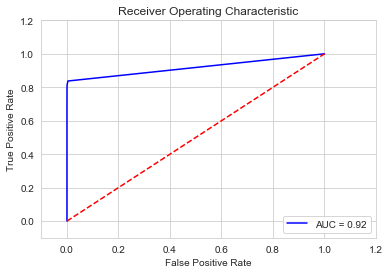

In [28]:
from sklearn import ensemble

# Initialising and fitting the model
rf = ensemble.RandomForestClassifier()
rf.fit(X_train, y_train)

# Testing prediction
y_hat = rf.predict_proba(X_test)[:,1]

# Assume threshold of .5
threshold = np.where(y_hat>0.5,1,0)
cross = pd.crosstab(threshold, y_test)
print(cross)
acc = (cross[0][0]+cross[1][1])/len(y_hat)
sensitive = cross[1][1]/(cross[1][0]+cross[1][1])
print('Accuracy is: ', acc)
print('Sensitivity is: ', sensitive)

preds = rf.predict_proba(X_test)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [29]:
# Assume threshold of .2
threshold = np.where(y_hat>0.2,1,0)
cross = pd.crosstab(threshold, y_test)
print(cross)

# Change to df to make life easy
table_pd = pd.DataFrame(cross)

acc = (cross[0][0]+cross[1][1])/len(y_hat)

test_tI_errors = table_pd.iloc[0,1]/(table_pd.iloc[0,0]+table_pd.iloc[1,1]+
                                               table_pd.iloc[1,0]+table_pd.iloc[0,1])
test_tII_errors = table_pd.iloc[1,0]/(table_pd.iloc[0,0]+table_pd.iloc[1,1]+
                                               table_pd.iloc[1,0]+table_pd.iloc[0,1])
sensitive = table_pd.iloc[1,1]/(table_pd.iloc[1,1]+table_pd.iloc[0,1])
print((
    'Test set accuracy: {}\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n'
    'Test set sensitivity: {}').format(acc, test_tI_errors, test_tII_errors, sensitive))

Class      0   1
row_0           
0      71068  26
1         11  97
Test set accuracy: 0.9994803516755147
Percent Type I errors: 0.00036515828207072835
Percent Type II errors: 0.00015449004241453892
Test set sensitivity: 0.7886178861788617


Improvement in precision from the logit model, with the lower Type II errors.

Random forests can suffer from high variance (if they are not pruned) which makes their results fragile to the specific training data used.

In [30]:
# Cross validating to make sure the model is not overfitting
score = 'recall'
rfc = ensemble.RandomForestClassifier()
recall_cv = model_selection.cross_val_score(rfc, X, y, cv = 5, scoring=score)
print(recall_cv)

C:\Users\catan\.conda\envs\catanEnv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\catan\.conda\envs\catanEnv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\catan\.conda\envs\catanEnv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\catan\.conda\envs\catanEnv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\catan\.conda\envs\catan

[0.97979798 0.74747475 0.67346939 0.74489796 0.67346939]


In [31]:
# Try StratiefiedKFold
count = 0
skf = model_selection.StratifiedKFold(n_splits=5, shuffle=True)
for train_index, test_index in skf.split(X, y):
    Xs_train, Xs_test = X.iloc[train_index], X.iloc[test_index]
    ys_train, ys_test = y.iloc[train_index], y.iloc[test_index]
    rfc = ensemble.RandomForestClassifier()
    rfc.fit(Xs_train, ys_train)
    y_hat = rf.predict_proba(Xs_test)[:,1]
    # Threshold of 0.3
    threshold = np.where(y_hat>0.3,1,0)
    cross = pd.crosstab(threshold, ys_test)
    print(cross)
    acc = (cross[0][0]+cross[1][1])/len(y_hat)
    sensitive = cross[1][1]/(cross[1][0]+cross[1][1])
    count += 1
    print('Accuracy for fold {} is {}'.format(count, acc))
    print('Sensitivity for fold {} is {}'.format(count, sensitive))

C:\Users\catan\.conda\envs\catanEnv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Class      0   1
row_0           
0      56859   7
1          4  92
Accuracy for fold 1 is 0.9998068888030617
Sensitivity for fold 1 is 0.9292929292929293


C:\Users\catan\.conda\envs\catanEnv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Class      0   1
row_0           
0      56857   7
1          6  92
Accuracy for fold 2 is 0.9997717776763456
Sensitivity for fold 2 is 0.9292929292929293


C:\Users\catan\.conda\envs\catanEnv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Class      0   1
row_0           
0      56862   8
1          1  90
Accuracy for fold 3 is 0.9998419971559488
Sensitivity for fold 3 is 0.9183673469387755


C:\Users\catan\.conda\envs\catanEnv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Class      0   1
row_0           
0      56860   2
1          3  96
Accuracy for fold 4 is 0.9999122206421938
Sensitivity for fold 4 is 0.9795918367346939


C:\Users\catan\.conda\envs\catanEnv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Class      0   1
row_0           
0      56862   7
1          1  91
Accuracy for fold 5 is 0.9998595530275101
Sensitivity for fold 5 is 0.9285714285714286


So unfortunately the model is still overfitting according to a standard CV. However, if the model is adjusted to ensure a consistent sample of y, then it performs well.


### RF with class weights

One way to address the imbalance of the data is by using weighted random forest


In [32]:
rfc = ensemble.RandomForestClassifier(class_weight='balanced')
rfc.fit(X_train, y_train)
y_hat = rfc.predict_proba(X_test)[:,1]

# Assume threshold of .2
threshold = np.where(y_hat>0.2,1,0)
cross = pd.crosstab(threshold, y_test)
print(cross)

# Change to df to make life easy
table_pd = pd.DataFrame(cross)

acc = (cross[0][0]+cross[1][1])/len(y_hat)

test_tI_errors = table_pd.iloc[0,1]/(table_pd.iloc[0,0]+table_pd.iloc[1,1]+
                                               table_pd.iloc[1,0]+table_pd.iloc[0,1])
test_tII_errors = table_pd.iloc[1,0]/(table_pd.iloc[0,0]+table_pd.iloc[1,1]+
                                               table_pd.iloc[1,0]+table_pd.iloc[0,1])
sensitive = table_pd.iloc[1,1]/(table_pd.iloc[1,1]+table_pd.iloc[0,1])
print((
    'Test set accuracy: {}\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n'
    'Test set sensitivity: {}').format(acc, test_tI_errors, test_tII_errors, sensitive))

precision_cv = model_selection.cross_val_score(rfc, X, y, cv = 5, scoring=score)
print(precision_cv)

# Try StratiefiedKFold
count = 0
skf = model_selection.StratifiedKFold(n_splits=5, shuffle=True)
for train_index, test_index in skf.split(X, y):
    Xs_train, Xs_test = X.iloc[train_index], X.iloc[test_index]
    ys_train, ys_test = y.iloc[train_index], y.iloc[test_index]
    rfc = ensemble.RandomForestClassifier(class_weight='balanced')
    rfc.fit(Xs_train, ys_train)
    y_hat = rf.predict_proba(Xs_test)[:,1]
    # Threshold of 0.3
    threshold = np.where(y_hat>0.3,1,0)
    cross = pd.crosstab(threshold, ys_test)
    print(cross)
    acc = (cross[0][0]+cross[1][1])/len(y_hat)
    sensitive = cross[1][1]/(cross[1][0]+cross[1][1])
    count += 1
    print('Accuracy for fold {} is {}'.format(count, acc))
    print('Sensitivity for fold {} is {}'.format(count, sensitive))


C:\Users\catan\.conda\envs\catanEnv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Class      0    1
row_0            
0      71074   23
1          5  100
Test set accuracy: 0.9996067526193084
Percent Type I errors: 0.0003230246341394905
Percent Type II errors: 7.022274655206315e-05
Test set sensitivity: 0.8130081300813008
[0.81818182 0.78787879 0.60204082 0.55102041 0.47959184]


C:\Users\catan\.conda\envs\catanEnv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Class      0   1
row_0           
0      56860   5
1          3  94
Accuracy for fold 1 is 0.9998595554931358
Sensitivity for fold 1 is 0.9494949494949495


C:\Users\catan\.conda\envs\catanEnv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Class      0   1
row_0           
0      56861  12
1          2  87
Accuracy for fold 2 is 0.9997542221129876
Sensitivity for fold 2 is 0.8787878787878788


C:\Users\catan\.conda\envs\catanEnv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Class      0   1
row_0           
0      56861   6
1          2  92
Accuracy for fold 3 is 0.9998595530275101
Sensitivity for fold 3 is 0.9387755102040817


C:\Users\catan\.conda\envs\catanEnv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Class      0   1
row_0           
0      56861   4
1          2  94
Accuracy for fold 4 is 0.9998946647706325
Sensitivity for fold 4 is 0.9591836734693877


C:\Users\catan\.conda\envs\catanEnv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Class      0   1
row_0           
0      56857   4
1          6  94
Accuracy for fold 5 is 0.9998244412843875
Sensitivity for fold 5 is 0.9591836734693877


### RF with optimized hyperparameters

In [33]:
# Trying to build a more robust random forest

# Gridsearch to find optimal values of some of the hyperparameters in boosting model
# Adjusting n_estimators to build more complex trees
# Not adjusting max_features - auto works best
# Adjusting min_sample_split to prevent overfitting (could also try max_depth or min_sample_leaf)

params = { "n_estimators" : [5,10,50],
         'min_samples_split': [2,10]}

# Initialize the model
rf = ensemble.RandomForestClassifier()

# Apply GridSearch to the model
grid = model_selection.GridSearchCV(rf, params)

#Fit on train datase
grid.fit(X_train, y_train)
y_pred = grid.predict(X_test)
y_pred_probs = grid.predict_proba(X_test)
table_pd = pd.DataFrame(pd.crosstab(y_pred, y_test, margins=True))
print(table_pd)

grid.best_estimator_

C:\Users\catan\.conda\envs\catanEnv\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Class      0    1    All
row_0                   
0      71077   37  71114
1          2   86     88
All    71079  123  71202


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [34]:
# Cross validating to make sure the model is not overfitting
score = 'recall'
rfc = ensemble.RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
recall_cv = model_selection.cross_val_score(rfc, X, y, cv = 5, scoring=score)
print(recall_cv)

C:\Users\catan\.conda\envs\catanEnv\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\catan\.conda\envs\catanEnv\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\catan\.conda\envs\catanEnv\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\catan\.conda\envs\catanEnv\lib\site-packages\sklearn

[0.97979798 0.74747475 0.67346939 0.82653061 0.67346939]


### RF with balanced sample

In [35]:

# Initialising and fitting the model
rf = ensemble.RandomForestClassifier()
rf.fit(X_balanced, y_balanced)

# Testing prediction
y_hat = rf.predict_proba(X_test)[:,1]

# Assume threshold of .5
threshold = np.where(y_hat>0.5,1,0)
cross = pd.crosstab(threshold, y_test)
print(cross)
acc = (cross[0][0]+cross[1][1])/len(y_hat)
sensitive = cross[1][1]/(cross[1][0]+cross[1][1])
print('Accuracy is: ', acc)
print('Sensitivity is: ', sensitive)

# Assume threshold of .2
print("Threshold of 0.2")
threshold = np.where(y_hat>0.2,1,0)
cross = pd.crosstab(threshold, y_test)
print(cross)
acc = (cross[0][0]+cross[1][1])/len(y_hat)
sensitive = cross[1][1]/(cross[1][0]+cross[1][1])
print('Accuracy is: ', acc)
print('Sensitivity is: ', sensitive)

Class      0    1
row_0            
0      70801   16
1        278  107
Accuracy is:  0.9958709025027387
Sensitivity is:  0.8699186991869918
Threshold of 0.2
Class      0    1
row_0            
0      67427   14
1       3652  109
Accuracy is:  0.9485126822280273
Sensitivity is:  0.8861788617886179


C:\Users\catan\.conda\envs\catanEnv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [36]:
# Apply model to a couple of representative samples (stratify sampling)
# Note the model would've seen some, but not all of the y observations
# Key is to test stability

# 5 folds

for i in range(1,10): 
    Xb_train, Xb_test, yb_train, yb_test = model_selection.train_test_split(X, y, stratify=y)
    y_hat = rf.predict_proba(Xb_test)[:,1]
    # Threshold of 0.2
    threshold = np.where(y_hat>0.5,1,0)
    cross = pd.crosstab(threshold, yb_test)
    print(cross)
    acc = (cross[0][0]+cross[1][1])/len(y_hat)
    sensitive = cross[1][1]/(cross[1][0]+cross[1][1])
    print('Accuracy for fold {} is {}'.format(i, acc))
    print('Sensitivity for fold {} is {}'.format(i, sensitive))

Class      0    1
row_0            
0      70777    6
1        302  117
Accuracy for fold 1 is 0.9956742788123929
Sensitivity for fold 1 is 0.9512195121951219
Class      0    1
row_0            
0      70781    5
1        298  118
Accuracy for fold 2 is 0.995744501558945
Sensitivity for fold 2 is 0.959349593495935
Class      0    1
row_0            
0      70809    8
1        270  115
Accuracy for fold 3 is 0.9960956152917053
Sensitivity for fold 3 is 0.9349593495934959
Class      0    1
row_0            
0      70770    7
1        309  116
Accuracy for fold 4 is 0.9955619224179096
Sensitivity for fold 4 is 0.943089430894309
Class      0    1
row_0            
0      70780    8
1        299  115
Accuracy for fold 5 is 0.9956883233617033
Sensitivity for fold 5 is 0.9349593495934959
Class      0    1
row_0            
0      70795    5
1        284  118
Accuracy for fold 6 is 0.9959411252492908
Sensitivity for fold 6 is 0.959349593495935
Class      0    1
row_0            
0      70790  

### Summary for random forest classifier

4 models were used
1. Standard random forest classifier: 0.83 sensitivity, but still a lot of variability in CV (suggesting overfitting)
2. Random forest with optimized hyperparameters: Not significant improvement given additional complexity
3. Random forest with weighted class: Performs better than standard rf (sensitivity = 0.85) with no cost in FP
4. Random forest with oversampling: High sensitivity 0.9, but high cost in false positives (30 times of standard rf)

## Gradient boosting

In [37]:
from sklearn import ensemble

# Gradient boost with default hyperparameters
gbc = ensemble.GradientBoostingClassifier(n_estimators=200)
gbc.fit(X_train, y_train)

# Testing prediction
y_hat = gbc.predict_proba(X_test)[:,1]

# Assume threshold of .5
threshold = np.where(y_hat>0.5,1,0)
cross = pd.crosstab(threshold, y_test)
print(cross)
acc = (cross[0][0]+cross[1][1])/len(y_hat)
sensitive = cross[1][1]/(cross[1][0]+cross[1][1])
print('Accuracy is: ', acc)
print('Sensitivity is: ', sensitive)



Class      0   1
row_0           
0      71064  73
1         15  50
Accuracy is:  0.9987640796606837
Sensitivity is:  0.4065040650406504


In [38]:
# Assume threshold of .1
threshold = np.where(y_hat>0.1,1,0)
cross = pd.crosstab(threshold, y_test)
print(cross)
acc = (cross[0][0]+cross[1][1])/len(y_hat)
sensitive = cross[1][1]/(cross[1][0]+cross[1][1])
print('Accuracy is: ', acc)
print('Sensitivity is: ', sensitive)

Class      0   1
row_0           
0      71020  58
1         59  65
Accuracy is:  0.9983567877306817
Sensitivity is:  0.5284552845528455


### Gridsearch to optimize hyperparameters

In [39]:
# Gridsearch to find optimal values of some of the hyperparameters in boosting model
params = {'n_estimators': [10, 100, 200],
          'max_depth': [2, 4]}
# Initialize the model
gbc = ensemble.GradientBoostingClassifier()
grid = model_selection.GridSearchCV(gbc, params)

#Fit on train datase
grid.fit(X_train, y_train)
y_pred = grid.predict(X_test)
table_pd = pd.DataFrame(pd.crosstab(y_test, y_pred, margins=True))
print(table_pd)

grid.best_estimator_

C:\Users\catan\.conda\envs\catanEnv\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


col_0      0   1    All
Class                  
0      71063  16  71079
1         58  65    123
All    71121  81  71202


GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=2,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=4,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=10, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

### Summary for Gradient boost

Here two gradient boost models were calculated:
1. Standard gradient boost: lower precision than logit and rf 
2. Optimized gradient boost through GridSearch: High cost in terms of calculation, and gains are comparable to logit and random forest models (but with lower false positives)

## Conclusion

The random forest outperformed the logistic regressions, and was substantially faster to implement than the gradient boost models. Final model depends on the how the tradeoff between high precision and high false positives is resolved.